## Importar libreria

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
import urllib.request

# Desactivar verificación de certificados SSL
ssl._create_default_https_context = ssl._create_unverified_context

## Importar base de datos

In [2]:
df = sns.load_dataset('penguins')

In [3]:
p_df = (
    df
    .dropna()
    .copy()
)

## Limitaciones

1. Person solo nos indica si existe una correlación lineal entre nuestros datos
2. No nos indica el impacto de la correlación

## Estableciendo relaciones

### Existe a correlación lineal entre alguna de nuestras vairables

In [5]:
corr = p_df.select_dtypes(include=np.number).corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


### Visualizar la correlación

<Axes: >

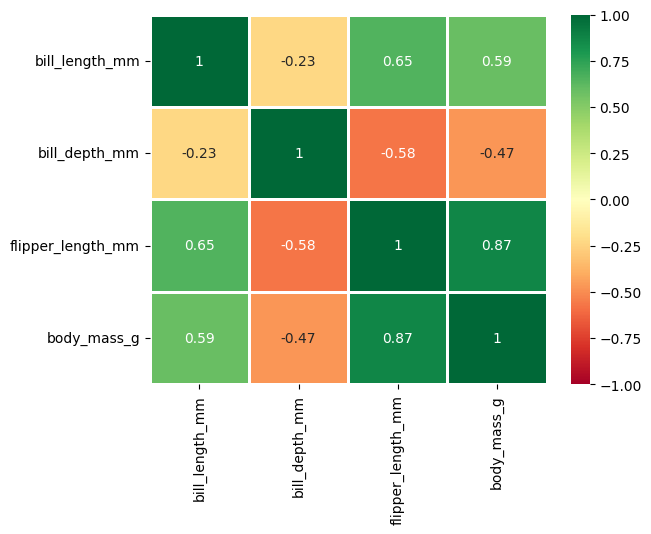

In [15]:
sns.heatmap(
    data=corr,
    cmap='RdYlGn',  # Cambia 'coolwarm' a 'RdYlGn'
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    linewidths=2,
)


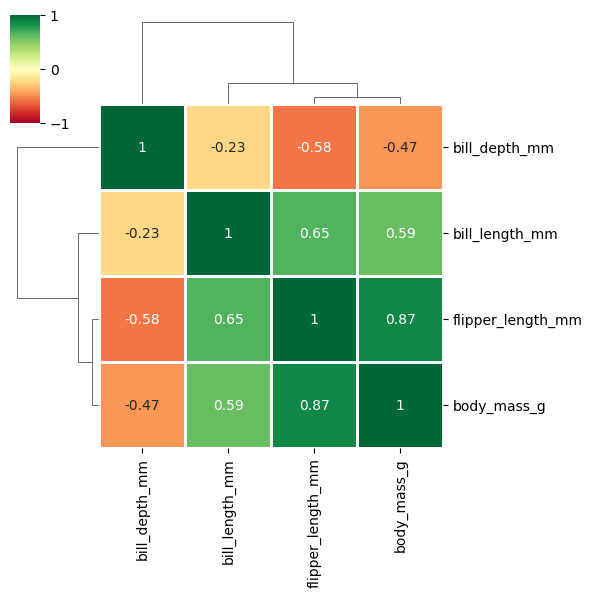

In [19]:
sns.clustermap(
    data=corr,
    cmap='RdYlGn',  # Cambia 'coolwarm' a 'RdYlGn'
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    linewidths=2,
    figsize=(6,6)
)


### Representar categorica como numerico

In [25]:
p_df_n = (
    p_df
    .assign(
        numeric_sex = lambda x: x.sex.map({'Male':0,'Female':1})
    )
)

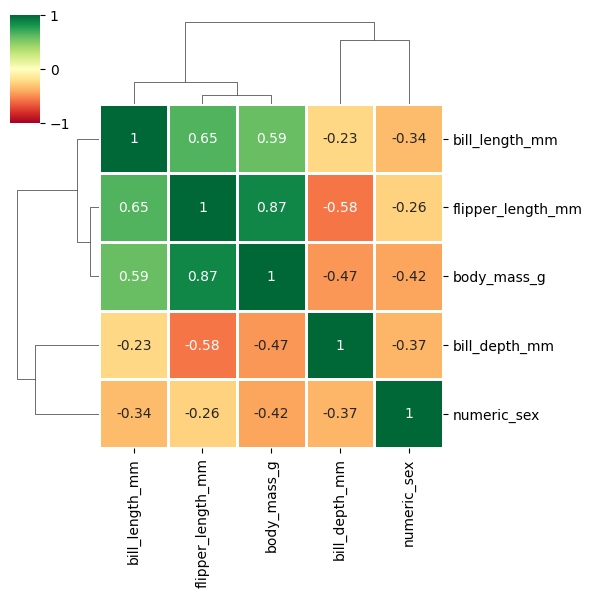

In [26]:
sns.clustermap(
    data=p_df_n.select_dtypes(include=np.number).corr(),
    cmap='RdYlGn',  # Cambia 'coolwarm' a 'RdYlGn'
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    linewidths=2,
    figsize=(6,6)
)

